In [ ]:
from google.colab import drive
rive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab_Notebooks"

/content/drive/MyDrive/Colab_Notebooks


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Colab_Notebooks/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 8369 images belonging to 9 classes.


In [ ]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [ ]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │         225,801 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,940,489 (56.99 MB)

 Trainable params: 225,801 (882.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit(train_data, epochs = 28, steps_per_epoch=len(train_data))

Epoch 1/28


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


262/262 ━━━━━━━━━━━━━━━━━━━━ 3044s 11s/step - accuracy: 0.2774 - loss: 2.1196
Epoch 2/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/28


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


262/262 ━━━━━━━━━━━━━━━━━━━━ 171s 632ms/step - accuracy: 0.4434 - loss: 1.6343
Epoch 4/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 200s 627ms/step - accuracy: 0.4772 - loss: 1.4948
Epoch 6/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 170s 630ms/step - accuracy: 0.5301 - loss: 1.3667
Epoch 8/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 170s 636ms/step - accuracy: 0.5472 - loss: 1.3080
Epoch 10/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 170s 631ms/step - accuracy: 0.5736 - loss: 1.2547
Epoch 12/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/28
262/262 ━━━━━━━━━━━━━━━━━━━━ 202s 633ms/step - accuracy: 0.5834 - loss:

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


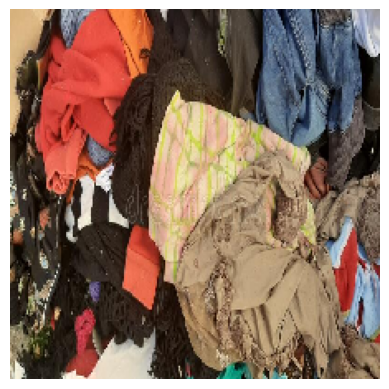

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Your waste material is  clothes  with  99.75  % accuracy


In [ ]:
waste_prediction("/content/drive/MyDrive/Colab_Notebooks/recycling waste/clothes/abandoned-clothes-background-looking-down-piles-colourful-old-clothes-discarded-ground-abandoned-clothes-background-174236667.jpg")

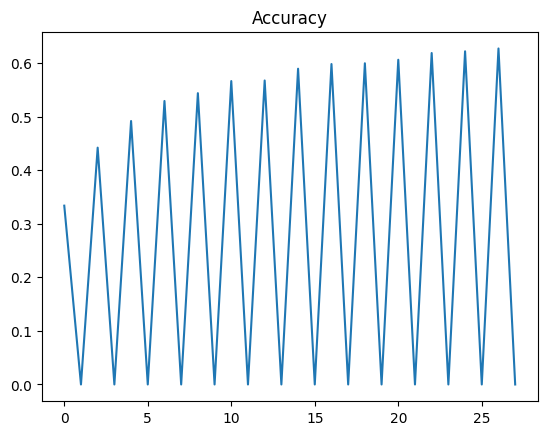

In [ ]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

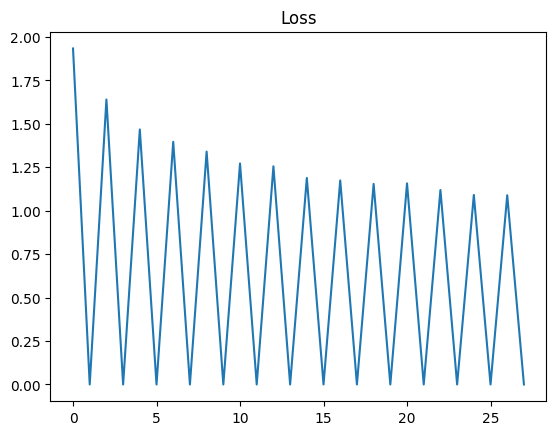

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [ ]:
model.save("classifyWaste.keras")
print("Model Saved Sucessfully")

Model Saved Sucessfully
